In [1]:
# Reference for building Logistic Regression model: https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8
import pandas as pd

In [2]:
# Please update the path to the activities.csv file from the repository
df = pd.read_csv('activities.csv')

In [3]:
df.head()

,Date,Name,Type,Moving Time,Distance (km),Elevation Gain (m),Avg Moving Speed (kph),Avg Pace (/km),Calories,Best 20min Speed (kph),...,HRSS / h,Best 20min HR (bpm),Cadence Avg Moving (rpm or spm),Avg Watts (w),Avg Watts / Kilograms (w/kg),Best 20min Power (w),Power Stress Score,Power Stress Score / h,Athlete Settings,Delete
0,2019-09-22T16:27:01-04:00,Último día de verano,Ride,01:58:06,62.5,589.0,31.7,01:53,1772,34,...,73,163,95,179,2.56,201,-,0,MaxHr 190bpm. RestHr 65bpm. Weight 70kg.,NaN
1,2019-09-21T11:57:23-04:00,Dos loops,Ride,02:38:51,80.1,890.0,28.7,02:05,2432,36.7,...,77,173,89,174,2.49,225,-,0,MaxHr 190bpm. RestHr 65bpm. Weight 70kg.,NaN
2,2019-09-20T17:55:47-04:00,Con poco tiempo,Ride,01:07:52,35.2,314.0,30.9,01:56,1029,34.5,...,76,163,91,169,2.42,188,-,0,MaxHr 190bpm. RestHr 65bpm. Weight 70kg.,NaN
3,2019-09-19T23:45:00-04:00,Complimentary calisthenics,Workout,01:00:00,0.0,0.0,-,-,-,-,...,-,-,-,-,-,-,-,-,Weight 70kg.,NaN
4,2019-09-18T17:41:48-04:00,Afternoon Ride,Ride,01:26:05,45.6,447.0,31.4,01:54,1326,36,...,81,173,97,181,2.59,221,-,0,MaxHr 190bpm. RestHr 65bpm. Weight 70kg.,NaN


In [4]:
# Before feature pre-processing
df.describe()

,Distance (km),Elevation Gain (m),Delete
count,573.000000,573.000000,0.0
mean,35.888656,620.718325,NaN
std,29.855291,601.756726,NaN
min,0.000000,0.000000,NaN
25%,9.300000,189.400000,NaN
50%,32.900000,526.000000,NaN
75%,51.900000,884.600000,NaN
max,170.600000,3617.000000,NaN


In [5]:
# Select features and rename columns
df = df[['Avg HR (bpm)','Date','Type','Distance (km)','Avg Pace (/km)','Calories','HRSS','Elevation Gain (m)']]
df = df.rename(columns={"Avg HR (bpm)": "AvgHR"})
df.head()

,AvgHR,Date,Type,Distance (km),Avg Pace (/km),Calories,HRSS,Elevation Gain (m)
0,158,2019-09-22T16:27:01-04:00,Ride,62.5,01:53,1772,144,589.0
1,158,2019-09-21T11:57:23-04:00,Ride,80.1,02:05,2432,217,890.0
2,159,2019-09-20T17:55:47-04:00,Ride,35.2,01:56,1029,87,314.0
3,-,2019-09-19T23:45:00-04:00,Workout,0.0,-,-,-,0.0
4,161,2019-09-18T17:41:48-04:00,Ride,45.6,01:54,1326,119,447.0


In [6]:
# Define features and pre-process data for final dataset
from dateutil.parser import parse
# Filter rows to include only those with AvgHR
df = df[df.AvgHR != '-']
# Only include Ride and VirtualRide types
types = ['Ride', 'VirtualRide']
df = df[df.Type.isin(types)]

df = df.reset_index(drop=True)
# Convert features to numbers
df["AvgHR"] = pd.to_numeric(df["AvgHR"])
df["Calories"] = pd.to_numeric(df["Calories"])
df["HRSS"] = pd.to_numeric(df["HRSS"])
df.head()
# Convert Avg Pace to seconds, parse Date and Time as separate columns
for i in range(df.shape[0]):
    #print('done')
    #print(df.loc[i,'Avg Pace (/km)'])
    (m, s) = str(df.loc[i,'Avg Pace (/km)']).split(':')
    df.loc[i,'Avg Pace (/km)']= (int(m) * 60) + int(s)
    dt = parse(df.loc[i,'Date'])
    df.loc[i,'Date'] = dt.date()
    df.loc[i,'Time'] = dt.time()
# Convert Avg Pace to number
df['Avg Pace (/km)'] = pd.to_numeric(df['Avg Pace (/km)'])

df.describe()

,AvgHR,Distance (km),Avg Pace (/km),Calories,HRSS,Elevation Gain (m)
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,155.032362,52.237540,150.624595,1573.423948,152.022654,888.765372
std,12.505282,27.117491,42.469105,848.025054,82.021593,650.796847
min,84.000000,1.400000,86.000000,48.000000,3.000000,0.000000
25%,149.000000,32.900000,119.000000,979.000000,98.000000,492.000000
50%,155.000000,50.100000,151.000000,1354.000000,128.000000,715.000000
75%,161.000000,60.400000,168.000000,1827.000000,187.000000,1128.900000
max,191.000000,170.600000,477.000000,5415.000000,471.000000,3617.000000


In [7]:
df.groupby(['Type']).mean()

,AvgHR,Distance (km),Avg Pace (/km),Calories,HRSS,Elevation Gain (m)
Type,,,,,,
Ride,154.535593,53.271525,152.298305,1615.294915,155.122034,912.209831
VirtualRide,165.500000,30.450000,115.357143,691.142857,86.714286,394.757143


In [8]:
df.groupby(['Type']).describe()

AvgHR                                                       \
             count        mean        std    min     25%    50%     75%   
Type                                                                      
Ride         295.0  154.535593  12.103490   84.0  149.00  155.0  160.50   
VirtualRide   14.0  165.500000  16.383622  135.0  156.75  163.0  175.75   

                   Distance (km)             ...   HRSS         \
               max         count       mean  ...    75%    max   
Type                                         ...                 
Ride         191.0         295.0  53.271525  ...  189.5  471.0   
VirtualRide  191.0          14.0  30.450000  ...   94.0  127.0   

            Elevation Gain (m)                                               \
                         count        mean         std    min    25%    50%   
Type                                                                          
Ride                     295.0  912.209831  656.472151    0.0  512.0  743.0   
VirtualRide               14.0  394.757143  114.192663  230.6  301.0  368.5   

                              
                 75%     max  
Type                          
Ride         1131.85  3617.0  
VirtualRide   500.00   558.0  

[2 rows x 48 columns]

In [9]:
# Create binary labels for High 'AvgHR' (1) and Low 'AvgHR' (0) based on threshold of 154 bpm
for j in range(df.shape[0]):
    if int(df.loc[j,'AvgHR']) > 154:
        #print(df.loc[j,'AvgHR'])
        df.loc[j,'AvgHR_bin'] = 1
    else: 
        df.loc[j,'AvgHR_bin'] = 0

In [10]:
df

,AvgHR,Date,Type,Distance (km),Avg Pace (/km),Calories,HRSS,Elevation Gain (m),Time,AvgHR_bin
0,158,2019-09-22,Ride,62.5,113,1772,144,589.0,16:27:01,1.0
1,158,2019-09-21,Ride,80.1,125,2432,217,890.0,11:57:23,1.0
2,159,2019-09-20,Ride,35.2,116,1029,87,314.0,17:55:47,1.0
3,161,2019-09-18,Ride,45.6,114,1326,119,447.0,17:41:48,1.0
4,155,2019-09-17,Ride,41.1,120,1156,96,454.0,16:47:31,1.0
...,...,...,...,...,...,...,...,...,...,...
304,149,2017-08-18,Ride,70.9,146,1817,175,1202.7,10:09:39,0.0
305,148,2017-08-16,Ride,70.1,159,1827,191,1185.3,11:44:59,0.0
306,150,2017-08-14,Ride,53.7,163,1432,161,1015.8,13:41:10,0.0
307,131,2017-08-13,Ride,40.5,161,941,70,350.4,13:14:20,0.0


In [11]:
df.groupby('AvgHR_bin').mean()

,AvgHR,Distance (km),Avg Pace (/km),Calories,HRSS,Elevation Gain (m)
AvgHR_bin,,,,,,
0.0,145.794521,55.214384,167.794521,1644.650685,145.445205,1048.490411
1.0,163.306748,49.571166,135.245399,1509.625767,157.914110,745.698773


/usr/local/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


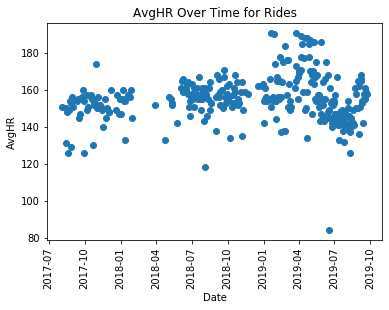

In [12]:
# Plot AvgHR over time for all virtual and outdoor bike rides
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot_date(df['Date'],df['AvgHR'])
plt.title('AvgHR Over Time for Rides')
plt.xlabel('Date')
plt.xticks(rotation=90)
plt.ylabel('AvgHR')
plt.show()

In [13]:
# Calculate sample size of each class
count_no_sub = len(df[df['AvgHR_bin']==1])
count_sub = len(df[df['AvgHR_bin']==0])
pct_of_no_sub = count_no_sub/(count_no_sub+count_sub)
print("percentage of High AvgHR is", '%.2f' %(pct_of_no_sub*100))
pct_of_sub = count_sub/(count_no_sub+count_sub)
print("percentage of Low AvgHR is", '%.2f' %(pct_of_sub*100))

percentage of High AvgHR is 52.75
percentage of Low AvgHR is 47.25


Text(0, 0.5, 'Frequency of Average HR')

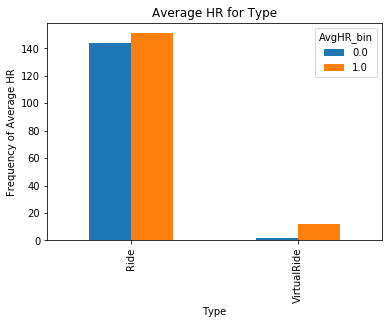

In [14]:
# Plot distribution of AvgHR for Rides and VirtualRides
import matplotlib.pyplot as plt
%matplotlib inline
pd.crosstab(df.Type,df.AvgHR_bin).plot(kind='bar')
plt.title('Average HR for Type')
plt.xlabel('Type')
plt.ylabel('Frequency of Average HR')
#plt.savefig('purchase_avghr_type')

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [16]:
# Define train and test set, perform RFE
window_size = 294
# removed Calories as feature since p-value was 0.07 > 0.05 (from below Logit function), as recommended
df_vars = ['Distance (km)', 'Avg Pace (/km)', 'HRSS', 'Elevation Gain (m)','AvgHR_bin']
df_final = df[df_vars]
df_final_vars=df_final.columns.values.tolist()
y=df_final.AvgHR_bin
X=[i for i in df_final_vars if i not in y]

X = df_final.loc[:, df_final.columns != 'AvgHR_bin']
y = df_final.loc[:, df_final.columns == 'AvgHR_bin']

# Configure train and test sets
X_train = X.iloc[window_size:]
y_train = y.iloc[window_size:]

X_test = X.iloc[:window_size]
y_test = y.iloc[:window_size]
print(X_test, y_test)

# Perform RFE (recursive feature elimination) to determine ranking of features
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(logreg, 20)
rfe = rfe.fit(X_train, y_train.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

     Distance (km)  Avg Pace (/km)  HRSS  Elevation Gain (m)
0             62.5             113   144               589.0
1             80.1             125   217               890.0
2             35.2             116    87               314.0
3             45.6             114   119               447.0
4             41.1             120    96               454.0
..             ...             ...   ...                 ...
289           40.6             233    86               716.4
290          124.3             159   391              2602.0
291           53.4             151   187              1012.3
292           53.4             152   169              1006.7
293           40.3             170   115               794.6

[294 rows x 4 columns]      AvgHR_bin
0          1.0
1          1.0
2          1.0
3          1.0
4          1.0
..         ...
289        0.0
290        0.0
291        1.0
292        1.0
293        0.0

[294 rows x 1 columns]
[ True  True  True  True]
[1 1 1 1]


/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [17]:
# Implement Logit model to determine p-values and coefficients for each feature
import statsmodels
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.307462
         Iterations 8
                          Results: Logit
Model:               Logit            Pseudo R-squared: 0.555     
Dependent Variable:  AvgHR_bin        AIC:              198.0117  
Date:                2019-11-17 22:53 BIC:              212.9451  
No. Observations:    309              Log-Likelihood:   -95.006   
Df Model:            3                LL-Null:          -213.71   
Df Residuals:        305              LLR p-value:      3.4432e-51
Converged:           1.0000           Scale:            1.0000    
No. Iterations:      8.0000                                       
------------------------------------------------------------------
                    Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
------------------------------------------------------------------
Distance (km)      -0.1857   0.0271 -6.8416 0.0000 -0.2389 -0.1325
Avg Pace (/km)     -0.0120   0.0029 -4.1900 0.0000 -0

## Iterate Over All Window Sizes for LR

In [74]:
# Iterate over all window sizes to determine optimal size
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Change window_size_optimization flag to perform iterations
window_size_optimization = True

if window_size_optimization == True:

    logreg = LogisticRegression()
    accuracies = np.zeros(276)
    #298 accuracy indices

    # Iterate over all window sizes and compute accuracy for each LR model
    for window_size in range(1,277):
    #window_size = 299
        print('# Predictions: ', window_size)
        X_train = X.iloc[window_size:]
        y_train = y.iloc[window_size:]
        # print('train labels: ', y_train)
        X_test = X.iloc[:window_size]
        y_test = y.iloc[:window_size]
        # print('test labels: ', y_test)

        actuals = pd.DataFrame(y_test)
        actuals = actuals.rename(columns={'AvgHR_bin':'Actuals'})
        # print('actuals: \n', actuals)
        preds = np.zeros(X_test.shape[0])
        # print('X_test: \n', X_test)
        for i in range(0,y_test.shape[0]):
            # print('X train shape: ', X_train.shape[0])
            # print('X train: ', X_train.head())
            logreg.fit(X_train, y_train.values.ravel())
            # Predict test set
            # print('X test: ', X_test.iloc[0])
            y_pred = logreg.predict(np.array(X_test.iloc[-1]).reshape(1,-1))
            # print('actual: ',y_test.loc[0, 'AvgHR_bin'], '\n pred: ',y_pred, '\n')
            preds[i] = y_pred
            #print('Accuracy of logistic regression classifier on test set {}: {:.2f}'.format(i, logreg.score(X_test, y_test)))
            #print("X test -1: ", X_test.iloc[-1])
            
            X_test_inst = pd.DataFrame(data= [X_test.iloc[-1]],columns=["Distance (km)","Avg Pace (/km)", "HRSS", "Elevation Gain (m)"])
            y_test_inst = pd.DataFrame(data = [y_test.iloc[-1]],columns=["AvgHR_bin"])
            #print("X test inst: ", X_test_inst)
            X_train = X_train.drop(X_train.index[-1]).reset_index(drop=True)
            X_train = pd.concat([X_test_inst,X_train]).reset_index(drop = True)
            #print("X train: \n", X_train)

            y_train = y_train.drop(y_train.index[-1])
            y_train = pd.concat([y_test_inst,y_train])
            y_train = y_train.reset_index(drop=True)
            #print("y train \n", y_train)

            X_test = X_test.drop(X_test.index[-1])
            X_test = X_test.reset_index(drop=True)
            #print("X test: \n", X_test)
            y_test = y_test.drop(y_test.index[-1])
            y_test = y_test.reset_index(drop=True)
            
        preds_act_df = pd.DataFrame(preds, columns=['Predictions'])
        preds_act_df = preds_act_df.join(actuals)
        # print('actuals and preds: \n', preds_act_df)
        accuracy = metrics.accuracy_score(preds_act_df.Actuals.ravel(),preds_act_df.Predictions.ravel())
        print('accuracy for window size {}: {}'.format(309-window_size, accuracy))
        accuracies[window_size-1] = accuracy
    print('Accuracies: ', accuracies)
    # Output accuracies for each window size to Accuracies_for_Window_Size_Variations.csv file 
    with open('Accuracies_for_Window_Size_Variations.csv', 'w') as f:
        for i in range(0,len(accuracies)):
            f.write(str(308-i) + ': ' + str(accuracies[i]))
            f.write('\n')

# Predictions:  1
accuracy for window size 308: 1.0
# Predictions:  2
accuracy for window size 307: 1.0
# Predictions:  3
accuracy for window size 306: 1.0
# Predictions:  4
accuracy for window size 305: 1.0
# Predictions:  5
accuracy for window size 304: 0.8
# Predictions:  6
accuracy for window size 303: 0.6666666666666666
# Predictions:  7
accuracy for window size 302: 0.7142857142857143
# Predictions:  8
accuracy for window size 301: 0.5
# Predictions:  9
accuracy for window size 300: 0.3333333333333333
# Predictions:  10
accuracy for window size 299: 0.2
# Predictions:  11
accuracy for window size 298: 0.2727272727272727
# Predictions:  12
accuracy for window size 297: 0.5
# Predictions:  13
accuracy for window size 296: 0.6923076923076923
# Predictions:  14
accuracy for window size 295: 0.7142857142857143
# Predictions:  15
accuracy for window size 294: 0.7333333333333333
# Predictions:  16
accuracy for window size 293: 0.625
# Predictions:  17
accuracy for window size 292: 0.529

accuracy for window size 183: 0.4603174603174603
# Predictions:  127
accuracy for window size 182: 0.4015748031496063
# Predictions:  128
accuracy for window size 181: 0.390625
# Predictions:  129
accuracy for window size 180: 0.4496124031007752
# Predictions:  130
accuracy for window size 179: 0.4076923076923077
# Predictions:  131
accuracy for window size 178: 0.4580152671755725
# Predictions:  132
accuracy for window size 177: 0.44696969696969696
# Predictions:  133
accuracy for window size 176: 0.46616541353383456
# Predictions:  134
accuracy for window size 175: 0.4253731343283582
# Predictions:  135
accuracy for window size 174: 0.35555555555555557
# Predictions:  136
accuracy for window size 173: 0.36764705882352944
# Predictions:  137
accuracy for window size 172: 0.3722627737226277
# Predictions:  138
accuracy for window size 171: 0.34782608695652173
# Predictions:  139
accuracy for window size 170: 0.381294964028777
# Predictions:  140
accuracy for window size 169: 0.4
# Pred

accuracy for window size 62: 0.46963562753036436
# Predictions:  248
accuracy for window size 61: 0.5040322580645161
# Predictions:  249
accuracy for window size 60: 0.5461847389558233
# Predictions:  250
accuracy for window size 59: 0.524
# Predictions:  251
accuracy for window size 58: 0.42231075697211157
# Predictions:  252
accuracy for window size 57: 0.44841269841269843
# Predictions:  253
accuracy for window size 56: 0.5019762845849802
# Predictions:  254
accuracy for window size 55: 0.468503937007874
# Predictions:  255
accuracy for window size 54: 0.4666666666666667
# Predictions:  256
accuracy for window size 53: 0.51953125
# Predictions:  257
accuracy for window size 52: 0.5058365758754864
# Predictions:  258
accuracy for window size 51: 0.4689922480620155
# Predictions:  259
accuracy for window size 50: 0.5096525096525096
# Predictions:  260
accuracy for window size 49: 0.5230769230769231
# Predictions:  261
accuracy for window size 48: 0.5210727969348659
# Predictions:  262

In [70]:
# Read in accuracies for each window size from Accuracies_for_Window_Size_Variations.csv file and sort by accuracy to determine best window size
import csv
pd.set_option('display.max_columns', None)  # or 1000
pd.set_option('display.max_rows', None)  # or 1000
mylist = pd.DataFrame(columns=['Window', 'Accuracy'])
with open('Accuracies_for_Window_Size_Variations.csv', 'r') as csvfile:
    for i,row in enumerate(csv.reader(csvfile, delimiter='\n')):
        mylist.loc[i,'Window'] = row[0].split(':')[0]
        mylist.loc[i,'Accuracy'] = row[0].split(':')[1]
print(mylist.sort_values('Accuracy', 0,ascending=False))

    Window              Accuracy
0      308                   1.0
2      306                   1.0
3      305                   1.0
1      307                   1.0
85     223    0.8023255813953488
4      304                   0.8
90     218    0.7692307692307693
82     226    0.7469879518072289
88     220    0.7415730337078652
97     211    0.7346938775510204
14     294    0.7333333333333333
98     210    0.7272727272727273
104    204    0.7238095238095238
13     295    0.7142857142857143
6      302    0.7142857142857143
87     221    0.6931818181818182
12     296    0.6923076923076923
96     212    0.6907216494845361
105    203    0.6886792452830188
84     224    0.6823529411764706
93     215    0.6808510638297872
89     219    0.6777777777777778
95     213    0.6770833333333334
100    208    0.6732673267326733
83     225    0.6666666666666666
71     237    0.6666666666666666
5      303    0.6666666666666666
86     222    0.6666666666666666
79     229                0.6625
78     230

In [75]:
import numpy as np
# Run LR with optimal window size of 15 (# predictions = 294)
window_size = 86
print('# Predictions: ', window_size)
print('Window Size: ', 309-window_size)
# train set
X_train = X.iloc[window_size:]
y_train = y.iloc[window_size:]
print('train labels: ', y_train)
# test set
X_test = X.iloc[:window_size]
y_test = y.iloc[:window_size]
print('test labels: ', y_test)

actuals = pd.DataFrame(y_test)
actuals = actuals.rename(columns={'AvgHR_bin':'Actuals'})
# print('actuals: \n', actuals)
preds = np.zeros(X_test.shape[0])
# print('X_test: \n', X_test)
for i in range(0,y_test.shape[0]):
    print('Iteration: ', i)
    print('X train shape: ', X_train.shape[0])
    print('X test shape: ', y_test.shape[0])
    logreg.fit(X_train, y_train.values.ravel())
    # Predict test set
    y_pred = logreg.predict(np.array(X_test.iloc[-1]).reshape(1,-1))
    print('actual: ',y_test.iloc[-1], '\n pred: ',y_pred, '\n')
    preds[i] = y_pred
    # print('Accuracy of logistic regression classifier on test set {}: {:.2f}'.format(i, logreg.score(X_test, y_test)))
    #print('test instance: ', X_test.iloc[-1])
    # X_train = pd.concat([X_test.iloc[0], X_train]).reset_index(drop = True)
    # print('new X train: ', X_train.head())
    
    #print("X test -1: ", X_test.iloc[-1])
    X_test_inst = pd.DataFrame(data= [X_test.iloc[-1]],columns=["Distance (km)","Avg Pace (/km)", "HRSS", "Elevation Gain (m)"])
    y_test_inst = pd.DataFrame(data = [y_test.iloc[-1]],columns=["AvgHR_bin"])
    #print("X test inst: ", X_test_inst)
    X_train = X_train.drop(X_train.index[-1]).reset_index(drop=True)
    X_train = pd.concat([X_test_inst,X_train]).reset_index(drop = True)
    #print("X train: \n", X_train)

    y_train = y_train.drop(y_train.index[-1])
    y_train = pd.concat([y_test_inst,y_train])
    y_train = y_train.reset_index(drop=True)
    #print("y train \n", y_train)
    
    X_test = X_test.drop(X_test.index[-1])
    X_test = X_test.reset_index(drop=True)
    #print("X test: \n", X_test)

    y_test = y_test.drop(y_test.index[-1])
    y_test = y_test.reset_index(drop=True)

preds_act_df = pd.DataFrame(preds, columns=['Predictions'])
preds_act_df = preds_act_df.join(actuals)
print('actuals and preds: \n', preds_act_df)
accuracy = metrics.accuracy_score(preds_act_df.Actuals.ravel(),preds_act_df.Predictions.ravel())
print('accuracy for window size {}: {}'.format(window_size, accuracy))


# Predictions:  86
Window Size:  223
train labels:       AvgHR_bin
86         1.0
87         1.0
88         1.0
89         0.0
90         1.0
91         1.0
92         1.0
93         1.0
94         1.0
95         1.0
96         1.0
97         0.0
98         1.0
99         1.0
100        1.0
101        1.0
102        1.0
103        1.0
104        0.0
105        1.0
106        0.0
107        0.0
108        1.0
109        1.0
110        1.0
111        1.0
112        1.0
113        1.0
114        1.0
115        1.0
116        1.0
117        1.0
118        1.0
119        1.0
120        1.0
121        1.0
122        1.0
123        0.0
124        0.0
125        0.0
126        1.0
127        0.0
128        1.0
129        1.0
130        1.0
131        0.0
132        1.0
133        0.0
134        1.0
135        1.0
136        0.0
137        1.0
138        1.0
139        1.0
140        1.0
141        1.0
142        0.0
143        1.0
144        1.0
145        0.0
146        1.0
147        1.0
148

actual:  AvgHR_bin    0.0
Name: 47, dtype: float64 
 pred:  [0.] 

Iteration:  39
X train shape:  223
X test shape:  47
actual:  AvgHR_bin    0.0
Name: 46, dtype: float64 
 pred:  [0.] 

Iteration:  40
X train shape:  223
X test shape:  46
actual:  AvgHR_bin    0.0
Name: 45, dtype: float64 
 pred:  [0.] 

Iteration:  41
X train shape:  223
X test shape:  45
actual:  AvgHR_bin    0.0
Name: 44, dtype: float64 
 pred:  [0.] 

Iteration:  42
X train shape:  223
X test shape:  44
actual:  AvgHR_bin    0.0
Name: 43, dtype: float64 
 pred:  [0.] 

Iteration:  43
X train shape:  223
X test shape:  43
actual:  AvgHR_bin    0.0
Name: 42, dtype: float64 
 pred:  [0.] 

Iteration:  44
X train shape:  223
X test shape:  42
actual:  AvgHR_bin    0.0
Name: 41, dtype: float64 
 pred:  [0.] 

Iteration:  45
X train shape:  223
X test shape:  41
actual:  AvgHR_bin    0.0
Name: 40, dtype: float64 
 pred:  [0.] 

Iteration:  46
X train shape:  223
X test shape:  40
actual:  AvgHR_bin    0.0
Name: 39, dtyp

In [76]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix1 = confusion_matrix(actuals, preds)
print(confusion_matrix1)

[[51  9]
 [ 8 18]]


In [77]:
tn, fp, fn, tp = confusion_matrix(actuals, preds).ravel()
print('true neg: ', tn, '\nfalse pos: ', fp, '\nfalse neg: ', fn, '\ntrue pos: ',tp)

true neg:  51 
false pos:  9 
false neg:  8 
true pos:  18


In [78]:
# Precision, recall, f1-score, support (# of test instances per class)
from sklearn.metrics import classification_report
print(classification_report(actuals, preds))

              precision    recall  f1-score   support

         0.0       0.86      0.85      0.86        60
         1.0       0.67      0.69      0.68        26

    accuracy                           0.80        86
   macro avg       0.77      0.77      0.77        86
weighted avg       0.80      0.80      0.80        86



In [24]:
# ROC curve
'''
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(actuals, logreg.predict(np.array(X_test.iloc[0].reshape(1,-1))
fpr, tpr, thresholds = roc_curve(y_test.iloc[0], logreg.predict_proba(np.array(X_test.iloc[0].reshape(1,-1))[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()
'''

'\nfrom sklearn.metrics import roc_auc_score\nfrom sklearn.metrics import roc_curve\nlogit_roc_auc = roc_auc_score(actuals, logreg.predict(np.array(X_test.iloc[0].reshape(1,-1))\nfpr, tpr, thresholds = roc_curve(y_test.iloc[0], logreg.predict_proba(np.array(X_test.iloc[0].reshape(1,-1))[:,1])\nplt.figure()\nplt.plot(fpr, tpr, label=\'Logistic Regression (area = %0.2f)\' % logit_roc_auc)\nplt.plot([0, 1], [0, 1],\'r--\')\nplt.xlim([0.0, 1.0])\nplt.ylim([0.0, 1.05])\nplt.xlabel(\'False Positive Rate\')\nplt.ylabel(\'True Positive Rate\')\nplt.title(\'Receiver operating characteristic\')\nplt.legend(loc="lower right")\nplt.savefig(\'Log_ROC\')\nplt.show()\n'

## Look Ahead Implementation with LR

In [125]:
import numpy as np
import math
import statistics as stats
# Run LR with optimal window size of 15 (# predictions = 294)

window_size = 86 # num of preds, window_size = 309-window_size param
print('# Predictions: ', window_size)
print('Window Size: ', 309-window_size)
# train set
X_train = X.iloc[window_size:]
y_train = y.iloc[window_size:]
print('train labels: ', y_train)
# test set
X_test = X.iloc[:window_size]
y_test = y.iloc[:window_size]
print('test labels: ', y_test)

look_ahead = 86


accuracies = np.zeros(math.ceil(y_test.shape[0]/look_ahead))
# print('X_test: \n', X_test)

for i in range(0,math.ceil(y_test.shape[0]/look_ahead)):
    preds = np.zeros(min(look_ahead,y_test.shape[0]))
    actuals_look_ahead = np.zeros(min(look_ahead,y_test.shape[0]))
    print('Iteration: ', i)
    print('X train shape: ', X_train.shape[0])
    print('X test shape: ', y_test.shape[0])
    logreg.fit(X_train, y_train.values.ravel())
    # Predict test set
    for j in range(1,min(look_ahead+1,y_test.shape[0]+1)):
        y_pred = logreg.predict(np.array(X_test.iloc[-j]).reshape(1,-1))
        print('actual: ',y_test.iloc[-j], '\n pred: ',y_pred, '\n')
        preds[j-1] = y_pred
        actuals_look_ahead[j-1] = y_test.iloc[-j]
    # print('Accuracy of logistic regression classifier on test set {}: {:.2f}'.format(i, logreg.score(X_test, y_test)))
    #print('test instance: ', X_test.iloc[-1])
    # X_train = pd.concat([X_test.iloc[0], X_train]).reset_index(drop = True)
    # print('new X train: ', X_train.head())
    
    #print("X test -1: ", X_test.iloc[-1])
    X_test_inst = pd.DataFrame(columns=["Distance (km)","Avg Pace (/km)", "HRSS", "Elevation Gain (m)"])
    y_test_inst = pd.DataFrame(columns=["AvgHR_bin"])
    for k in range(1,min(look_ahead+1,y_test.shape[0]+1)):
        X_test_inst = X_test_inst.append(X_test.iloc[-k])
        y_test_inst = y_test_inst.append(y_test.iloc[-k])        
    print("X test inst: ", X_test_inst)

    #X_train = X_train.drop(X_train.index[-1]).reset_index(drop=True)
    X_train = pd.concat([X_test_inst,X_train]).reset_index(drop = True)
    #print("X train: \n", X_train)

    #y_train = y_train.drop(y_train.index[-1])
    y_train = pd.concat([y_test_inst,y_train]).reset_index(drop=True)
    #print("y train \n", y_train)
    
    X_test = X_test.drop(X_test_inst.index.values)
    X_test = X_test.reset_index(drop=True)
    #print("X test: \n", X_test)

    y_test = y_test.drop(y_test_inst.index.values)
    y_test = y_test.reset_index(drop=True)
    
    preds_act_df = pd.DataFrame(preds)
    act_df = pd.DataFrame(actuals_look_ahead)
    print("predictions: ", preds)
    print("actuals: ", actuals_look_ahead)
    #preds_act_df = preds_act_df.join(act_df)
    #print('actuals and preds: \n', preds_act_df)
    accuracy = metrics.accuracy_score(preds,actuals_look_ahead)
    accuracies[i] = accuracy
    print('accuracy for window size {} with look ahead value {}: {}'.format(309-window_size, look_ahead, accuracy))
#print('accuracies: ', accuracies)
#print('avg accuracy: ', stats.mean(accuracies))
# preds_act_df = pd.DataFrame(preds)
# preds_act_df = preds_act_df.join(actuals)
# print('actuals and preds: \n', preds_act_df)
# accuracy = metrics.accuracy_score(preds_act_df.Actuals.ravel(),preds_act_df.Predictions.ravel())
# print('accuracy for window size {}: {}'.format(window_size, accuracy))

# Predictions:  86
Window Size:  223
train labels:       AvgHR_bin
86         1.0
87         1.0
88         1.0
89         0.0
90         1.0
91         1.0
92         1.0
93         1.0
94         1.0
95         1.0
96         1.0
97         0.0
98         1.0
99         1.0
100        1.0
101        1.0
102        1.0
103        1.0
104        0.0
105        1.0
106        0.0
107        0.0
108        1.0
109        1.0
110        1.0
111        1.0
112        1.0
113        1.0
114        1.0
115        1.0
116        1.0
117        1.0
118        1.0
119        1.0
120        1.0
121        1.0
122        1.0
123        0.0
124        0.0
125        0.0
126        1.0
127        0.0
128        1.0
129        1.0
130        1.0
131        0.0
132        1.0
133        0.0
134        1.0
135        1.0
136        0.0
137        1.0
138        1.0
139        1.0
140        1.0
141        1.0
142        0.0
143        1.0
144        1.0
145        0.0
146        1.0
147        1.0
148


actual:  AvgHR_bin    1.0
Name: 11, dtype: float64 
 pred:  [1.] 

actual:  AvgHR_bin    1.0
Name: 10, dtype: float64 
 pred:  [1.] 

actual:  AvgHR_bin    0.0
Name: 9, dtype: float64 
 pred:  [1.] 

actual:  AvgHR_bin    0.0
Name: 8, dtype: float64 
 pred:  [0.] 

actual:  AvgHR_bin    0.0
Name: 7, dtype: float64 
 pred:  [0.] 

actual:  AvgHR_bin    1.0
Name: 6, dtype: float64 
 pred:  [1.] 

actual:  AvgHR_bin    1.0
Name: 5, dtype: float64 
 pred:  [1.] 

actual:  AvgHR_bin    1.0
Name: 4, dtype: float64 
 pred:  [0.] 

actual:  AvgHR_bin    1.0
Name: 3, dtype: float64 
 pred:  [1.] 

actual:  AvgHR_bin    1.0
Name: 2, dtype: float64 
 pred:  [1.] 

actual:  AvgHR_bin    1.0
Name: 1, dtype: float64 
 pred:  [1.] 

actual:  AvgHR_bin    1.0
Name: 0, dtype: float64 
 pred:  [1.] 

X test inst:      Distance (km)  Avg Pace (/km)   HRSS  Elevation Gain (m)
85           56.3           121.0  142.0               668.0
84           40.2           113.0   91.0               379.0
83      

## Iterate Over All Look-Ahead Values for Given Window Size

In [121]:
import numpy as np
import math
import statistics as stats
# Run LR with optimal window size of 15 (# predictions = 294)

window_size = 86 # num of preds, window_size = 309-window_size param
print('# Predictions: ', window_size)
print('Window Size: ', 309-window_size)
average_accuracies = np.zeros(window_size)

for m in range(1,window_size+1):
    # train set
    X_train = X.iloc[window_size:]
    y_train = y.iloc[window_size:]
    #print('train labels: ', y_train)
    # test set
    X_test = X.iloc[:window_size]
    y_test = y.iloc[:window_size]
    #print('test labels: ', y_test)
    
    #look_ahead = 7
    look_ahead=m
    print("\n\nlook ahead: ", m)
    print("# iterations: ", math.ceil(y_test.shape[0]/look_ahead))
    
    #actuals = pd.DataFrame(y_test)
    #actuals = actuals.rename(columns={'AvgHR_bin':'Actuals'})
    accuracies = np.zeros(math.ceil(y_test.shape[0]/look_ahead))
    # print('actuals: \n', actuals)
    # preds = np.zeros((math.ceil(y_test.shape[0]/look_ahead),look_ahead))
    # actuals_look_ahead = np.zeros((math.ceil(y_test.shape[0]/look_ahead),look_ahead))
    # print('X_test: \n', X_test)
    for i in range(0,math.ceil(y_test.shape[0]/look_ahead)):
        preds = np.zeros(min(look_ahead,y_test.shape[0]))
        actuals_look_ahead = np.zeros(min(look_ahead,y_test.shape[0]))
#         print('Iteration: ', i)
#         print('X train shape: ', X_train.shape[0])
#         print('X test shape: ', y_test.shape[0])
        logreg.fit(X_train, y_train.values.ravel())
        # Predict test set
        for j in range(1,min(look_ahead+1,y_test.shape[0]+1)):
            y_pred = logreg.predict(np.array(X_test.iloc[-j]).reshape(1,-1))
#             print('actual: ',y_test.iloc[-j], '\n pred: ',y_pred, '\n')
            preds[j-1] = y_pred
            actuals_look_ahead[j-1] = y_test.iloc[-j]
        # print('Accuracy of logistic regression classifier on test set {}: {:.2f}'.format(i, logreg.score(X_test, y_test)))
        #print('test instance: ', X_test.iloc[-1])
        # X_train = pd.concat([X_test.iloc[0], X_train]).reset_index(drop = True)
        # print('new X train: ', X_train.head())

        #print("X test -1: ", X_test.iloc[-1])
        X_test_inst = pd.DataFrame(columns=["Distance (km)","Avg Pace (/km)", "HRSS", "Elevation Gain (m)"])
        y_test_inst = pd.DataFrame(columns=["AvgHR_bin"])
        for k in range(1,min(look_ahead+1,y_test.shape[0]+1)):
            X_test_inst = X_test_inst.append(X_test.iloc[-k])
            y_test_inst = y_test_inst.append(y_test.iloc[-k])        
        #print("X test inst: ", X_test_inst)

        #X_train = X_train.drop(X_train.index[-1]).reset_index(drop=True)
        X_train = pd.concat([X_test_inst,X_train]).reset_index(drop = True)
        #print("X train: \n", X_train)

        #y_train = y_train.drop(y_train.index[-1])
        y_train = pd.concat([y_test_inst,y_train]).reset_index(drop=True)
        #print("y train \n", y_train)

        X_test = X_test.drop(X_test_inst.index.values)
        X_test = X_test.reset_index(drop=True)
        #print("X test: \n", X_test)

        y_test = y_test.drop(y_test_inst.index.values)
        y_test = y_test.reset_index(drop=True)

        preds_act_df = pd.DataFrame(preds)
        act_df = pd.DataFrame(actuals_look_ahead)
#         print("predictions: ", preds)
#         print("actuals: ", actuals_look_ahead)
        #preds_act_df = preds_act_df.join(act_df)
        #print('actuals and preds: \n', preds_act_df)
        accuracy = metrics.accuracy_score(preds,actuals_look_ahead)
    
        accuracies[i] = accuracy
        # print('accuracy for window size {}: {}'.format(window_size, accuracy))
    
    print('accuracies: ', accuracies)
    avg_accuracy = stats.mean(accuracies)
    print('avg accuracy: ', avg_accuracy)
    average_accuracies[m-1] = avg_accuracy

avg_acc_df = pd.DataFrame(data=average_accuracies, columns=['Avg Accuracy'])
print('Averages: ', avg_acc_df) 


# Predictions:  86
Window Size:  223


look ahead:  1
# iterations:  86
accuracies:  [1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1.
 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1.]
avg accuracy:  0.8953488372093024


look ahead:  2
# iterations:  43
accuracies:  [1.  0.5 1.  1.  1.  1.  0.5 1.  1.  1.  1.  1.  1.  1.  1.  1.  0.5 1.
 1.  1.  1.  1.  1.  1.  1.  1.  0.5 0.5 1.  1.  1.  1.  1.  0.5 1.  1.
 0.5 1.  1.  1.  0.  1.  1. ]
avg accuracy:  0.8953488372093024


look ahead:  3
# iterations:  29
accuracies:  [0.66666667 1.         1.         1.         0.66666667 1.
 1.         1.         1.         1.         0.66666667 1.
 1.         1.         1.         1.         1.         0.66666667
 0.66666667 1.         1.         1.         0.66666667 1.
 0.66666667 1.         0.66666667 0.66666667 1.        ]
avg accuracy:

accuracies:  [0.9137931  0.85714286]
avg accuracy:  0.8854679802955665


look ahead:  59
# iterations:  2
accuracies:  [0.91525424 0.85185185]
avg accuracy:  0.8835530445699937


look ahead:  60
# iterations:  2
accuracies:  [0.91666667 0.84615385]
avg accuracy:  0.8814102564102564


look ahead:  61
# iterations:  2
accuracies:  [0.91803279 0.84      ]
avg accuracy:  0.879016393442623


look ahead:  62
# iterations:  2
accuracies:  [0.91935484 0.83333333]
avg accuracy:  0.8763440860215054


look ahead:  63
# iterations:  2
accuracies:  [0.92063492 0.82608696]
avg accuracy:  0.8733609385783299


look ahead:  64
# iterations:  2
accuracies:  [0.921875   0.81818182]
avg accuracy:  0.8700284090909092


look ahead:  65
# iterations:  2
accuracies:  [0.92307692 0.80952381]
avg accuracy:  0.8663003663003663


look ahead:  66
# iterations:  2
accuracies:  [0.92424242 0.8       ]
avg accuracy:  0.8621212121212121


look ahead:  67
# iterations:  2
accuracies:  [0.91044776 0.78947368]
avg accura

In [123]:
# Output accuracies for each window size to Accuracies_for_Look_Ahead_Variations.csv file 
with open('Accuracies_for_Look_Ahead_Variations.csv', 'w') as f:
    f.write("Look Ahead : Accuracy \n")
    for i in range(0,len(average_accuracies)):
        f.write(str(i+1) + ': ' + str(average_accuracies[i]))
        f.write('\n')

In [126]:
# Read in accuracies for each look ahead value from Accuracies_for_Look_Ahead_Variations.csv file and sort by accuracy to determine best look ahead value
import csv
pd.set_option('display.max_columns', None)  # or 1000
pd.set_option('display.max_rows', None)  # or 1000
mylist = pd.DataFrame(columns=['Look Ahead', 'Accuracy'])
with open('Accuracies_for_Look_Ahead_Variations.csv', 'r') as csvfile:
    for i,row in enumerate(csv.reader(csvfile, delimiter='\n')):
        mylist.loc[i,'Look Ahead'] = row[0].split(':')[0]
        mylist.loc[i,'Accuracy'] = row[0].split(':')[1]
print(mylist.sort_values('Accuracy', 0,ascending=False))

     Look Ahead             Accuracy
0   Look Ahead             Accuracy 
85           85   0.9470588235294117
84           84   0.9464285714285714
83           83   0.9457831325301205
82           82   0.9451219512195121
42           42   0.9285714285714286
41           41    0.926829268292683
28           28   0.9196428571428572
21           21   0.9142857142857143
14           14   0.9081632653061225
17           17   0.9019607843137255
7             7   0.9010989010989011
5             5                  0.9
4             4   0.8977272727272727
3             3    0.896551724137931
12           12   0.8958333333333333
1             1   0.8953488372093024
43           43   0.8953488372093024
86           86   0.8953488372093024
2             2   0.8953488372093024
29           29   0.8949096880131363
44           44   0.8944805194805194
45           45   0.8934959349593496
22           22   0.8931818181818182
30           30   0.8931623931623932
11           11   0.8926767676767676
4

Almost all accuracies are above 0.8. The highest accuracy is 0.947 and looks ahead 85 days, a value equal to almost the entire test set size. Rather than iterate through each test instance and leave one out, it is best to predict the entire test set at once, rather than leaving a group out at a time.

## Random Forest Implementation

In [131]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import math
import statistics as stats
# Run LR with optimal window size of 15 (# predictions = 294)

# Create the model with 100 trees
RF = RandomForestClassifier(n_estimators=100, 
                               bootstrap = True,
                               max_features = 'sqrt')
window_size = 86 # num of preds, window_size = 309-window_size param
print('# Predictions: ', window_size)
print('Window Size: ', 309-window_size)
# train set
X_train = X.iloc[window_size:]
y_train = y.iloc[window_size:]
print('train labels: ', y_train)
# test set
X_test = X.iloc[:window_size]
y_test = y.iloc[:window_size]
print('test labels: ', y_test)

look_ahead = 86


accuracies = np.zeros(math.ceil(y_test.shape[0]/look_ahead))
# print('X_test: \n', X_test)

for i in range(0,math.ceil(y_test.shape[0]/look_ahead)):
    preds = np.zeros(min(look_ahead,y_test.shape[0]))
    rf_probs = np.zeros(min(look_ahead,y_test.shape[0]))
    actuals_look_ahead = np.zeros(min(look_ahead,y_test.shape[0]))
    print('Iteration: ', i)
    print('X train shape: ', X_train.shape[0])
    print('X test shape: ', y_test.shape[0])
    RF.fit(X_train, y_train.values.ravel())
    # Predict test set
    for j in range(1,min(look_ahead+1,y_test.shape[0]+1)):
        y_pred = RF.predict(np.array(X_test.iloc[-j]).reshape(1,-1))
        print('actual: ',y_test.iloc[-j], '\n pred: ',y_pred, '\n')
        preds[j-1] = y_pred
        actuals_look_ahead[j-1] = y_test.iloc[-j]
        rf_probs[j-1] = RF.predict_proba(np.array(X_test.iloc[-j]).reshape(1,-1))[:, 1]
    # print('Accuracy of logistic regression classifier on test set {}: {:.2f}'.format(i, logreg.score(X_test, y_test)))
    #print('test instance: ', X_test.iloc[-1])
    # X_train = pd.concat([X_test.iloc[0], X_train]).reset_index(drop = True)
    # print('new X train: ', X_train.head())
    
    #print("X test -1: ", X_test.iloc[-1])
    X_test_inst = pd.DataFrame(columns=["Distance (km)","Avg Pace (/km)", "HRSS", "Elevation Gain (m)"])
    y_test_inst = pd.DataFrame(columns=["AvgHR_bin"])
    for k in range(1,min(look_ahead+1,y_test.shape[0]+1)):
        X_test_inst = X_test_inst.append(X_test.iloc[-k])
        y_test_inst = y_test_inst.append(y_test.iloc[-k])        
    print("X test inst: ", X_test_inst)

    X_train = X_train.drop(X_train.index[-1]).reset_index(drop=True)
    X_train = pd.concat([X_test_inst,X_train]).reset_index(drop = True)
    #print("X train: \n", X_train)

    y_train = y_train.drop(y_train.index[-1])
    y_train = pd.concat([y_test_inst,y_train]).reset_index(drop=True)
    #print("y train \n", y_train)
    
    X_test = X_test.drop(X_test_inst.index.values)
    X_test = X_test.reset_index(drop=True)
    #print("X test: \n", X_test)

    y_test = y_test.drop(y_test_inst.index.values)
    y_test = y_test.reset_index(drop=True)
    
    preds_act_df = pd.DataFrame(preds)
    act_df = pd.DataFrame(actuals_look_ahead)
    print("predictions: ", preds)
    print("actuals: ", actuals_look_ahead)
    #preds_act_df = preds_act_df.join(act_df)
    #print('actuals and preds: \n', preds_act_df)
    accuracy = metrics.accuracy_score(preds,actuals_look_ahead)
    accuracies[i] = accuracy
    print('accuracy for window size {} with look ahead value {}: {}'.format(309-window_size, look_ahead, accuracy))
print('accuracies: ', accuracies)
print('avg accuracy: ', stats.mean(accuracies))
print('probabilities: ', rf_probs)

# Predictions:  86
Window Size:  223
train labels:       AvgHR_bin
86         1.0
87         1.0
88         1.0
89         0.0
90         1.0
91         1.0
92         1.0
93         1.0
94         1.0
95         1.0
96         1.0
97         0.0
98         1.0
99         1.0
100        1.0
101        1.0
102        1.0
103        1.0
104        0.0
105        1.0
106        0.0
107        0.0
108        1.0
109        1.0
110        1.0
111        1.0
112        1.0
113        1.0
114        1.0
115        1.0
116        1.0
117        1.0
118        1.0
119        1.0
120        1.0
121        1.0
122        1.0
123        0.0
124        0.0
125        0.0
126        1.0
127        0.0
128        1.0
129        1.0
130        1.0
131        0.0
132        1.0
133        0.0
134        1.0
135        1.0
136        0.0
137        1.0
138        1.0
139        1.0
140        1.0
141        1.0
142        0.0
143        1.0
144        1.0
145        0.0
146        1.0
147        1.0
148

actual:  AvgHR_bin    0.0
Name: 32, dtype: float64 
 pred:  [0.] 

actual:  AvgHR_bin    0.0
Name: 31, dtype: float64 
 pred:  [1.] 

actual:  AvgHR_bin    0.0
Name: 30, dtype: float64 
 pred:  [0.] 

actual:  AvgHR_bin    0.0
Name: 29, dtype: float64 
 pred:  [0.] 

actual:  AvgHR_bin    0.0
Name: 28, dtype: float64 
 pred:  [1.] 

actual:  AvgHR_bin    0.0
Name: 27, dtype: float64 
 pred:  [0.] 

actual:  AvgHR_bin    0.0
Name: 26, dtype: float64 
 pred:  [0.] 

actual:  AvgHR_bin    0.0
Name: 25, dtype: float64 
 pred:  [0.] 

actual:  AvgHR_bin    0.0
Name: 24, dtype: float64 
 pred:  [0.] 

actual:  AvgHR_bin    0.0
Name: 23, dtype: float64 
 pred:  [0.] 

actual:  AvgHR_bin    0.0
Name: 22, dtype: float64 
 pred:  [0.] 

actual:  AvgHR_bin    0.0
Name: 21, dtype: float64 
 pred:  [0.] 

actual:  AvgHR_bin    1.0
Name: 20, dtype: float64 
 pred:  [1.] 

actual:  AvgHR_bin    1.0
Name: 19, dtype: float64 
 pred:  [1.] 

actual:  AvgHR_bin    0.0
Name: 18, dtype: float64 
 pred:  [1

Random Forest performs better than LR when looking ahead 1 value for a window size of 223 and using the 'simple moving average' method of dropping the oldest record and adding the newest test record for the next prediction (0.884 accuracy). When using the 'cumulative average method', or not dropping oldest record, RF scores 0.86 accuracy for a window size of 223. For a window size of 85, RF scored an accuracy of 0.906, while a window size of 86 yielded an accuracy of 0.814.